In [1]:
from node_plotter import ModelMapper
import json

In [2]:
data_example = json.load(open("example_gdm1.json"))

In [3]:
mapper = ModelMapper(data_example,'gdmv1','schemaorg',render=False)

gdmv1.required.gatewayId  -->  schemaorg.url  ( str --> str )
gdmv1.provenance.temporal.startDate  -->  schemaorg.temporalCoverage  ( str --> str )
gdmv1.provenance.temporal.endDate  -->  schemaorg.temporalCoverage  ( str --> str )


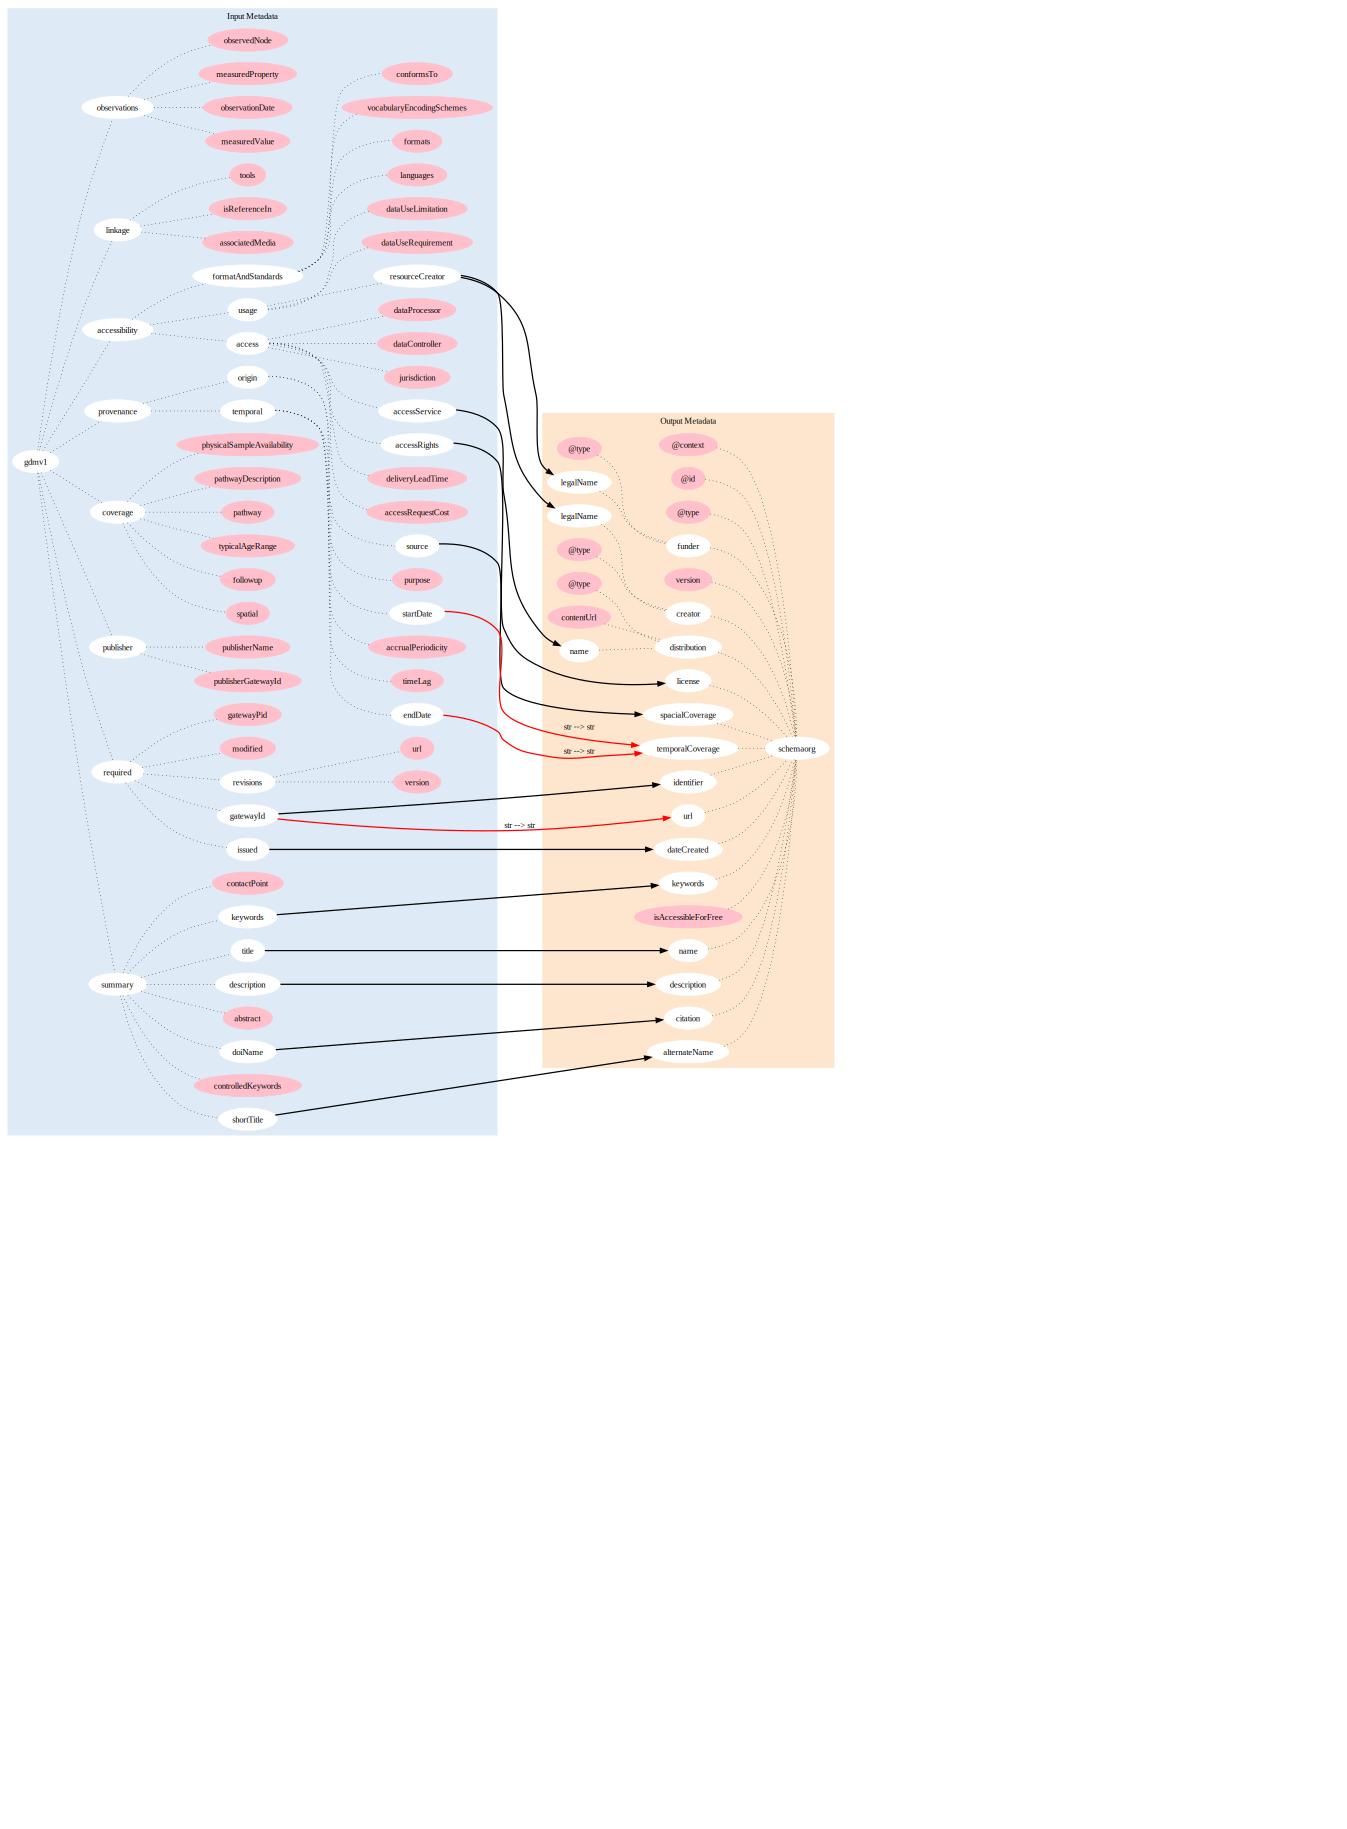

In [4]:
mapper.rankdir = 'LR'
dot = mapper.get_diagram()
dot

In [6]:
mapper.save_diagram()

In [7]:
with open('example_schema.json','w') as f:
    json.dump(mapper.output_metadata,f,indent=6)

In [8]:
import pandas as pd

In [9]:
t0 = pd.DataFrame(mapper.connectors).sort_values('from')#.set_index('from')
#tab['from'].str.split(".", expand = True).fillna('')
t0

,from,to,mod
14,gdmv1.accessibility.access.accessRights,schemaorg.license,None
12,gdmv1.accessibility.access.accessService,schemaorg.distribution.name,None
6,gdmv1.accessibility.usage.resourceCreator,schemaorg.funder.legalName,None
7,gdmv1.accessibility.usage.resourceCreator,schemaorg.creator.legalName,None
8,gdmv1.provenance.origin.source,schemaorg.spacialCoverage,None
10,gdmv1.provenance.temporal.endDate,schemaorg.temporalCoverage,str --> str
9,gdmv1.provenance.temporal.startDate,schemaorg.temporalCoverage,str --> str
0,gdmv1.required.gatewayId,schemaorg.identifier,None
1,gdmv1.required.gatewayId,schemaorg.url,str --> str
11,gdmv1.required.issued,schemaorg.dateCreated,None


In [10]:
t1 = pd.DataFrame(mapper.inodes).rename({'name':'from'},axis=1)
parents = t1['parent'].unique()
t1 = t1[~t1['from'].isin(parents)][['from']]
t1

,from
1,gdmv1.required.gatewayId
2,gdmv1.required.gatewayPid
3,gdmv1.required.issued
4,gdmv1.required.modified
6,gdmv1.required.revisions.version
7,gdmv1.required.revisions.url
9,gdmv1.summary.abstract
10,gdmv1.summary.contactPoint
11,gdmv1.summary.keywords
12,gdmv1.summary.controlledKeywords


In [11]:
t2 = pd.DataFrame(mapper.onodes).rename({'name':'to'},axis=1)
parents = t2['parent'].unique()
t2 = t2[~t2['to'].isin(parents)][['to']]
t2

,to
0,schemaorg.@context
1,schemaorg.@id
2,schemaorg.@type
3,schemaorg.identifier
4,schemaorg.version
5,schemaorg.url
6,schemaorg.name
7,schemaorg.alternateName
8,schemaorg.description
9,schemaorg.citation


In [12]:
tab = t1.merge(t0,on='from',how='left').merge(t2,on='to',how='outer').fillna('').set_index('from')
tab

,to,mod
from,,
gdmv1.required.gatewayId,schemaorg.identifier,
gdmv1.required.gatewayId,schemaorg.url,str --> str
gdmv1.required.gatewayPid,,
gdmv1.required.modified,,
gdmv1.required.revisions.version,,
gdmv1.required.revisions.url,,
gdmv1.summary.abstract,,
gdmv1.summary.contactPoint,,
gdmv1.summary.controlledKeywords,,


In [13]:
print (tab.to_markdown())

| from                                                             | to                                | mod         |
|:-----------------------------------------------------------------|:----------------------------------|:------------|
| gdmv1.required.gatewayId                                         | schemaorg.identifier              |             |
| gdmv1.required.gatewayId                                         | schemaorg.url                     | str --> str |
| gdmv1.required.gatewayPid                                        |                                   |             |
| gdmv1.required.modified                                          |                                   |             |
| gdmv1.required.revisions.version                                 |                                   |             |
| gdmv1.required.revisions.url                                     |                                   |             |
| gdmv1.summary.abstract                        